# Exploring factors that influence educational outcomes

https://www.kaggle.com/aljarah/xAPI-Edu-Data

## Dataset Information:

This is an educational data set which is collected from learning management system (LMS) called Kalboard 360. Kalboard 360 is a multi-agent LMS, which has been designed to facilitate learning through the use of leading-edge technology. Such system provides users with a synchronous access to educational resources from any device with Internet connection.

The data is collected using a learner activity tracker tool, which called experience API (xAPI). The xAPI is a component of the training and learning architecture (TLA) that enables to monitor learning progress and learner’s actions like reading an article or watching a training video. The experience API helps the learning activity providers to determine the learner, activity and objects that describe a learning experience. The dataset consists of 480 student records and 16 features. The features are classified into three major categories: (1) Demographic features such as gender and nationality. (2) Academic background features such as educational stage, grade Level and section. (3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

The dataset consists of 305 males and 175 females. The students come from different origins such as 179 students are from Kuwait, 172 students are from Jordan, 28 students from Palestine, 22 students are from Iraq, 17 students from Lebanon, 12 students from Tunis, 11 students from Saudi Arabia, 9 students from Egypt, 7 students from Syria, 6 students from USA, Iran and Libya, 4 students from Morocco and one student from Venezuela.

The dataset is collected through two educational semesters: 245 student records are collected during the first semester and 235 student records are collected during the second semester.

The data set includes also the school attendance feature such as the students are classified into two categories based on their absence days: 191 students exceed 7 absence days and 289 students their absence days under 7.

This dataset includes also a new category of features; this feature is parent parturition in the educational process. Parent participation feature have two sub features: Parent Answering Survey and Parent School Satisfaction. There are 270 of the parents answered survey and 210 are not, 292 of the parents are satisfied from the school and 188 are not.

(See the related papers for more details).

## Attributes

1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

The students are classified into three numerical intervals based on their total grade/mark:

Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.

## Load in libraries needed for the project

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('poster')

# %matplotlib inline

## Read in the data

In [4]:
data = pd.read_csv('education.csv')

## Check out the first couple lines

In [8]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## What features are in the dataset?

In [9]:
print('The features of this dataset are %s' % data.columns.values)

The features of this dataset are ['gender' 'NationalITy' 'PlaceofBirth' 'StageID' 'GradeID' 'SectionID'
 'Topic' 'Semester' 'Relation' 'raisedhands' 'VisITedResources'
 'AnnouncementsView' 'Discussion' 'ParentAnsweringSurvey'
 'ParentschoolSatisfaction' 'StudentAbsenceDays' 'Class']


## First, let's clean up the dataset

In [5]:
# rename one of the columns
data.rename(columns={'PlaceofBirth' : 'birthplace'})

# make all of the column names lowercase
data.columns = [column.lower() for column in data.columns]

# drop a column
data = data.drop('sectionid', 1)

data.head()

,gender,nationality,placeofbirth,stageid,gradeid,topic,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class
0,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Is there structure in this data?

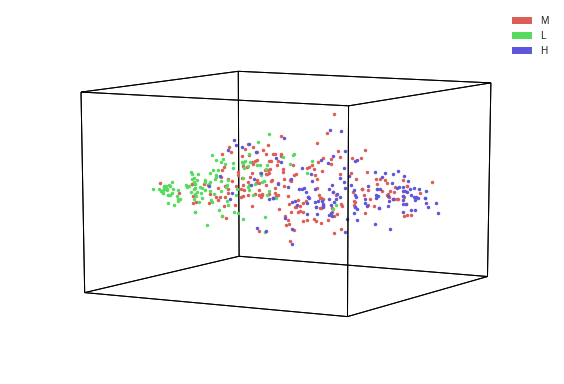

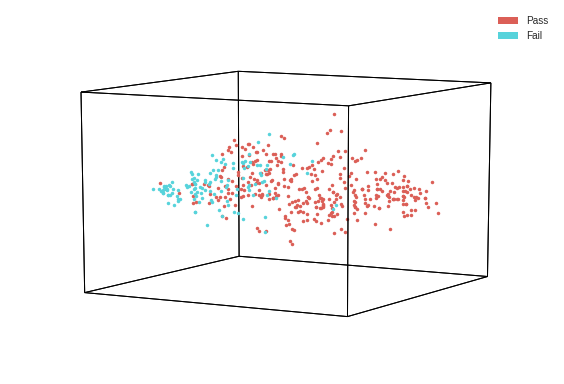

In [6]:
import hypertools as hyp
_ = hyp.plot(data, '.', group=data['class'], legend=['M','L','H'])
_ = hyp.plot(data, '.', group=data['class']!='L', legend=['Pass', 'Fail'])

## Get a quick summary of each of the feature

In [12]:
data.describe(include=['int64', 'object'])

,gender,nationality,placeofbirth,stageid,gradeid,topic,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class
count,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


## Selecting a column

In [13]:
data['gender']

0      M
1      M
2      M
3      M
4      M
5      F
6      M
7      M
8      F
9      F
10     M
11     M
12     M
13     M
14     F
15     F
16     M
17     M
18     F
19     M
20     F
21     F
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     F
      ..
450    F
451    F
452    F
453    F
454    F
455    F
456    F
457    F
458    M
459    M
460    M
461    M
462    M
463    M
464    F
465    F
466    F
467    F
468    F
469    F
470    M
471    M
472    M
473    M
474    F
475    F
476    F
477    F
478    F
479    F
Name: gender, Length: 480, dtype: object

## Selecting a row

In [14]:
data.loc[0,:]

# or multiple rows
# data.loc[0:10,:]

gender                               M
nationality                         KW
placeofbirth                    KuwaIT
stageid                     lowerlevel
gradeid                           G-04
topic                               IT
semester                             F
relation                        Father
raisedhands                         15
visitedresources                    16
announcementsview                    2
discussion                          20
parentansweringsurvey              Yes
parentschoolsatisfaction          Good
studentabsencedays             Under-7
class                                M
Name: 0, dtype: object

## Filtering based on a text value

In [15]:
data_satisfied_parents = data['parentschoolsatisfaction']=='Good'
data_satisfied_parents = data[data_satisfied_parents]
data_satisfied_parents.head()

,gender,nationality,placeofbirth,stageid,gradeid,topic,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class
0,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
7,M,KW,KuwaIT,MiddleSchool,G-07,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


## Filtering based on a numerical value

In [16]:
data[data['discussion']<20].head()

,gender,nationality,placeofbirth,stageid,gradeid,topic,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class
6,M,KW,KuwaIT,MiddleSchool,G-07,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
11,M,KW,KuwaIT,MiddleSchool,G-07,Math,F,Father,19,6,19,12,Yes,Good,Under-7,M
12,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,5,1,0,11,No,Bad,Above-7,L
13,M,lebanon,lebanon,MiddleSchool,G-08,Math,F,Father,20,14,12,19,No,Bad,Above-7,L
31,M,KW,KuwaIT,MiddleSchool,G-07,IT,F,Father,4,5,40,16,Yes,Good,Above-7,L


## Let's plot the counts for each feature

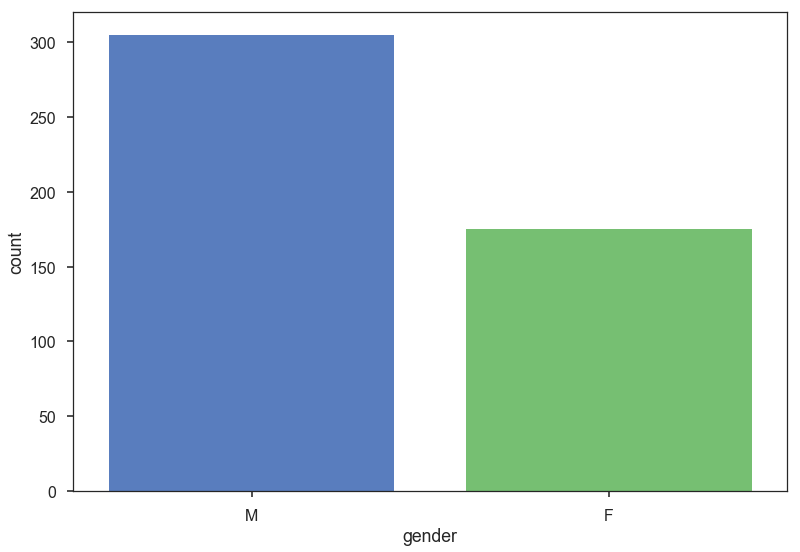

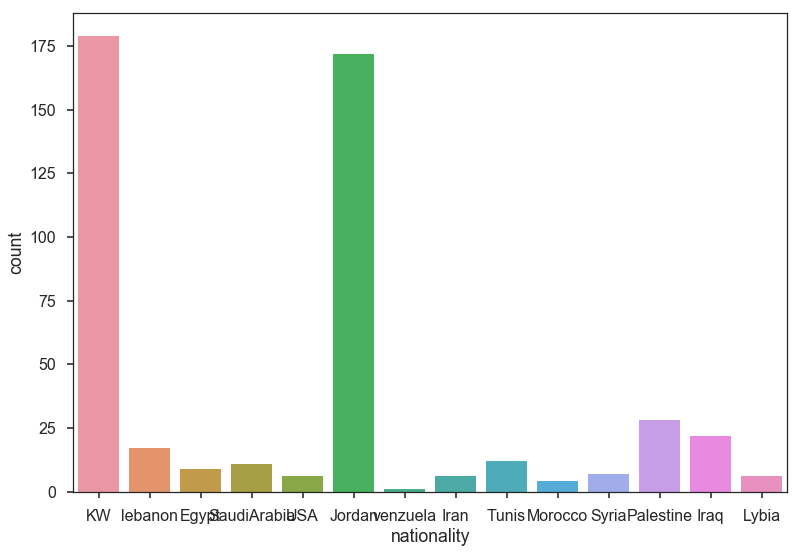

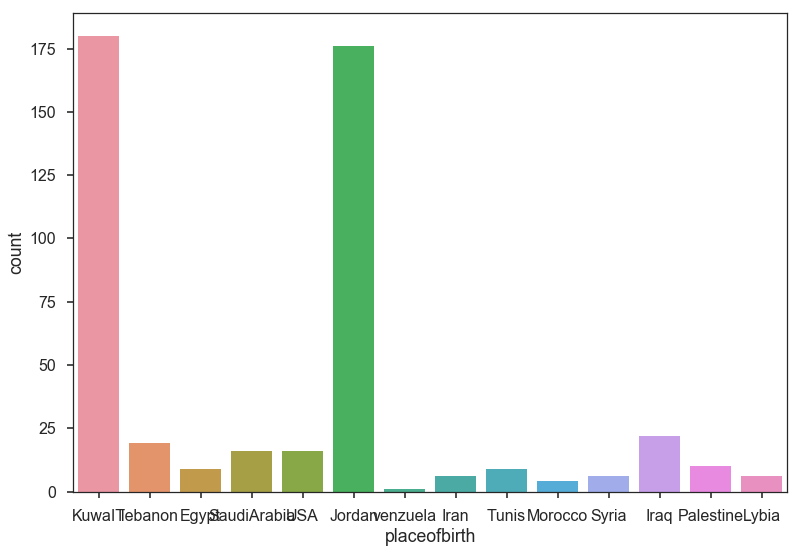

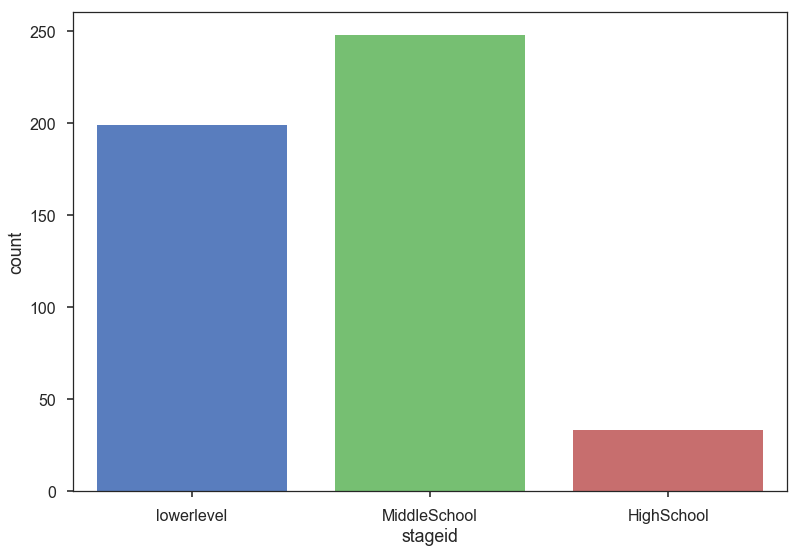

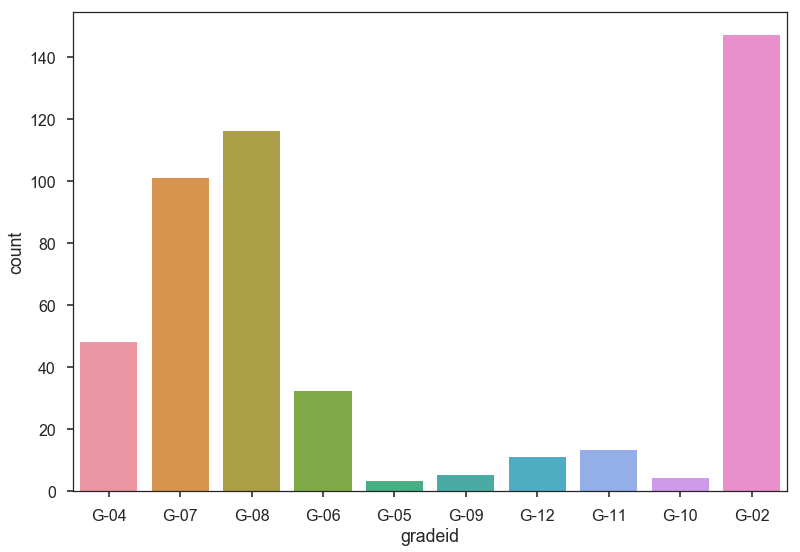

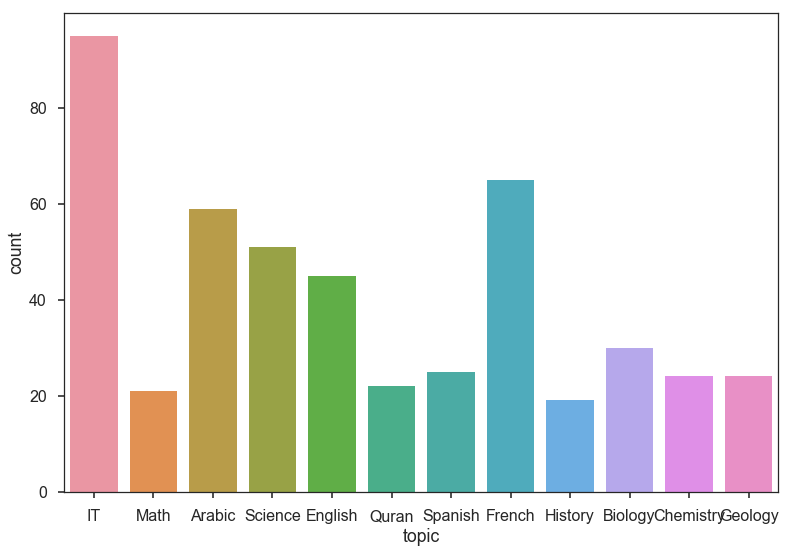

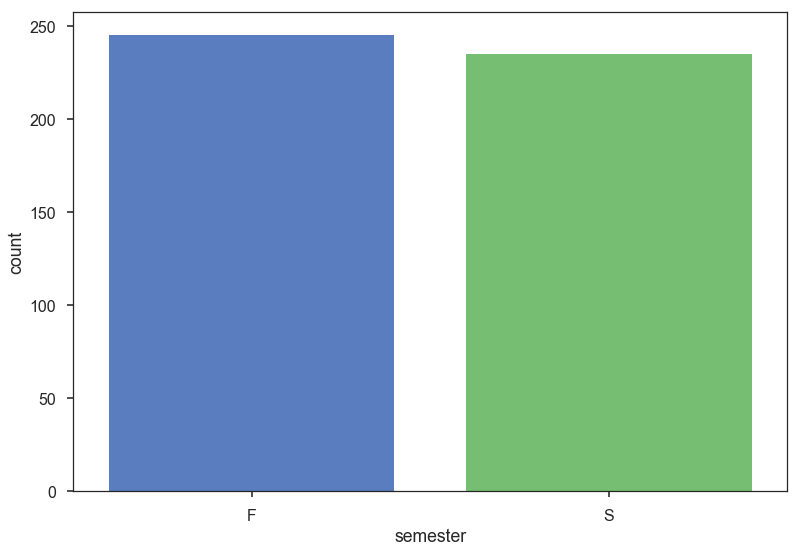

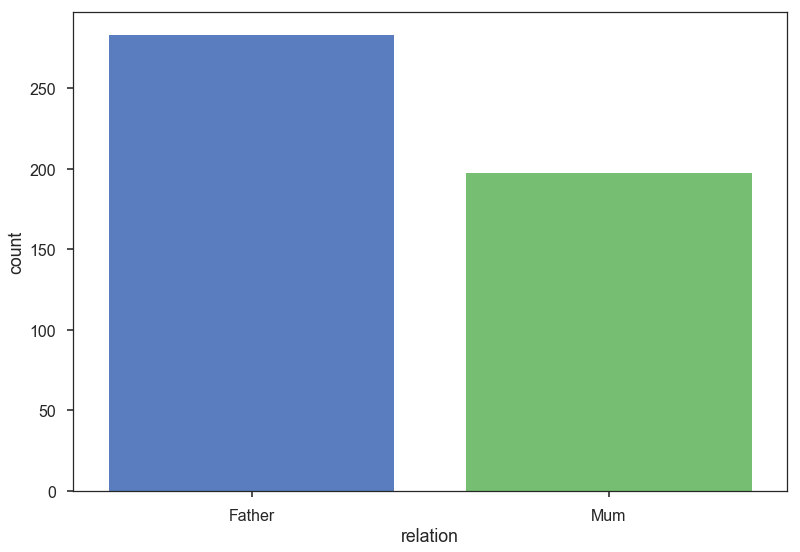

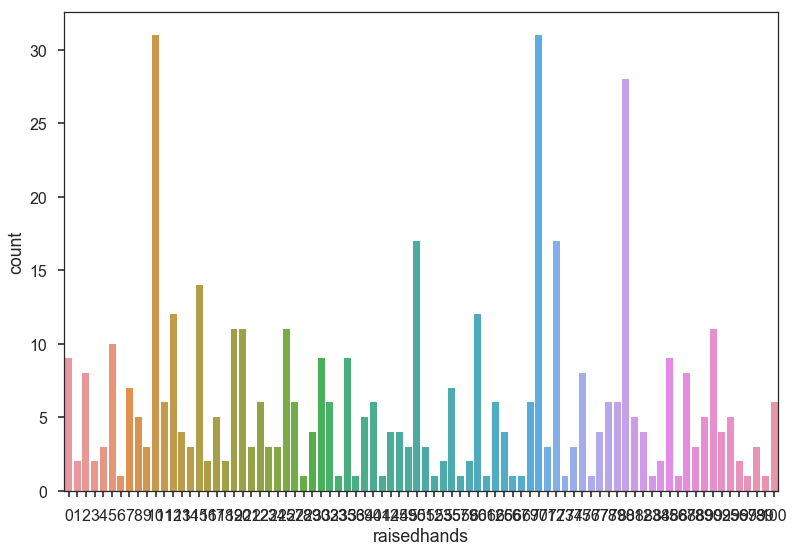

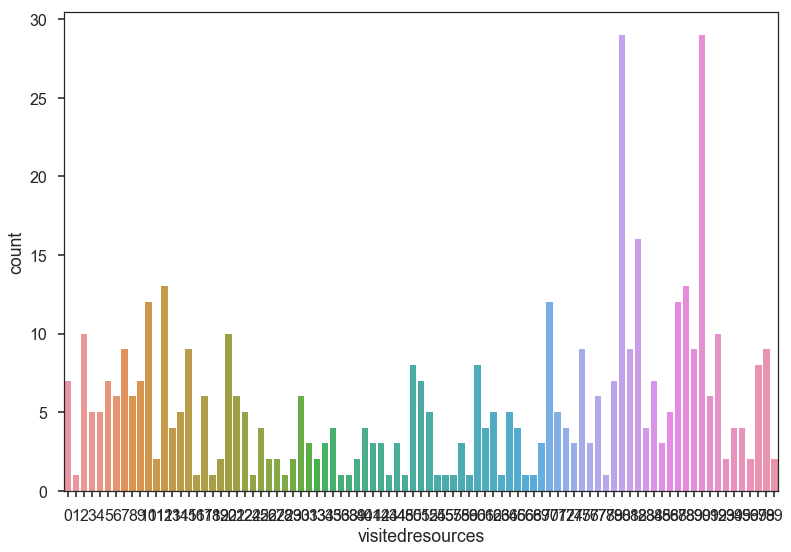

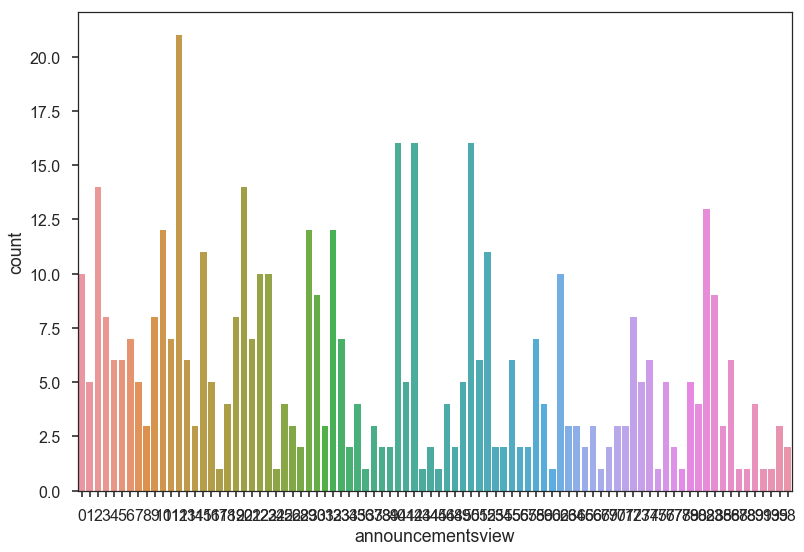

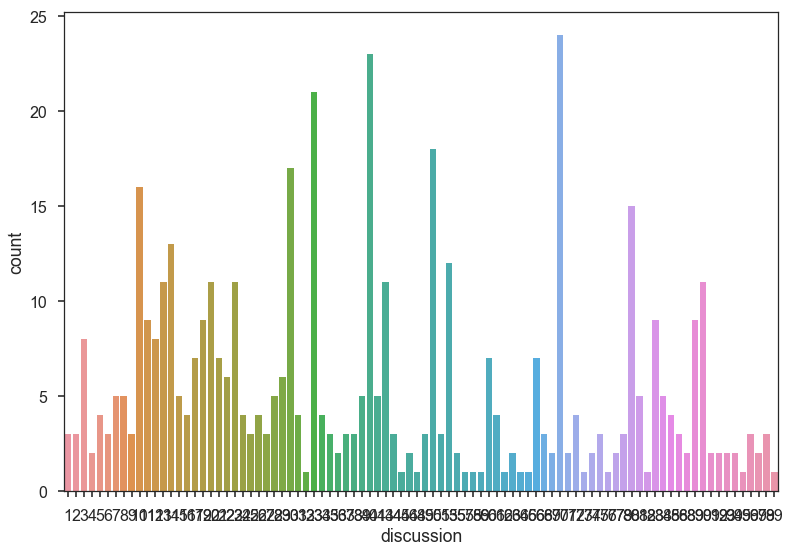

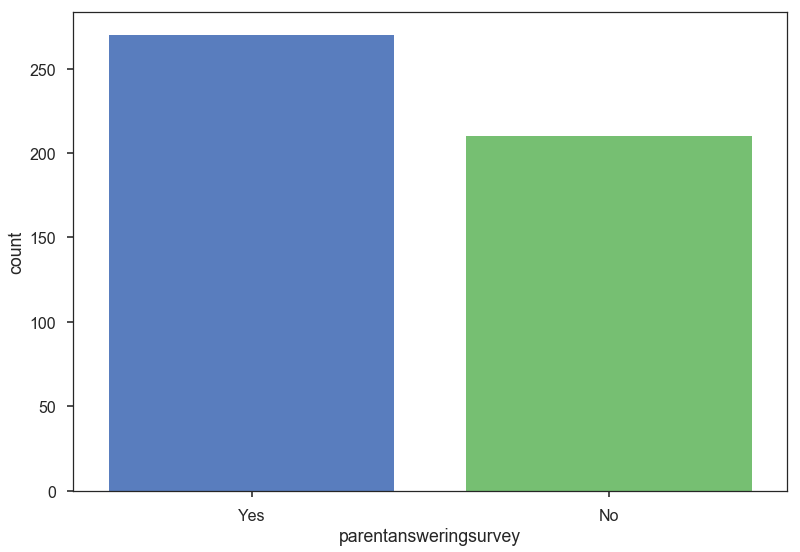

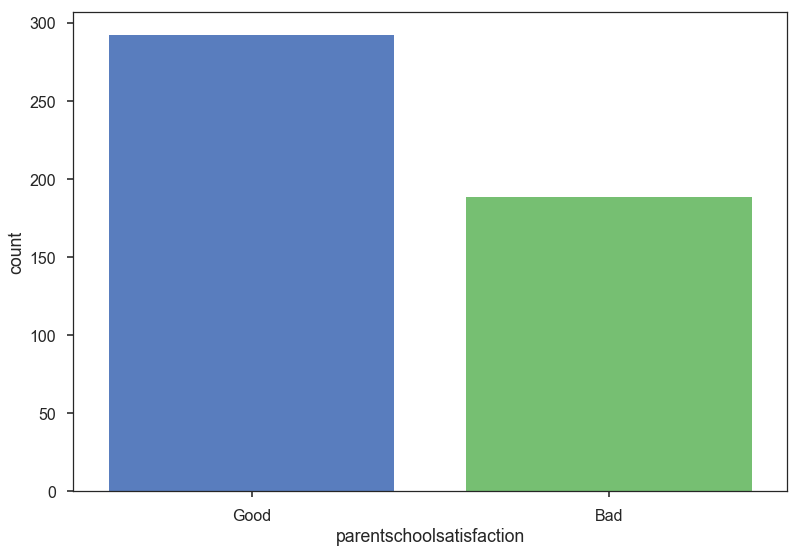

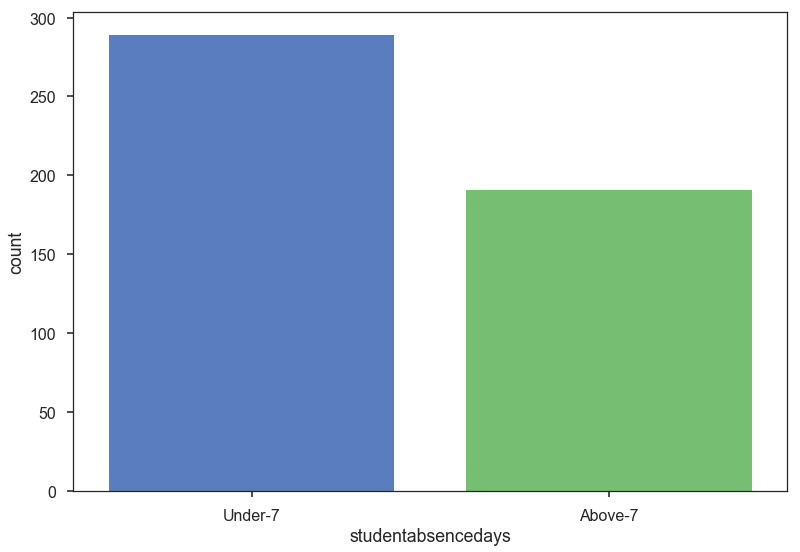

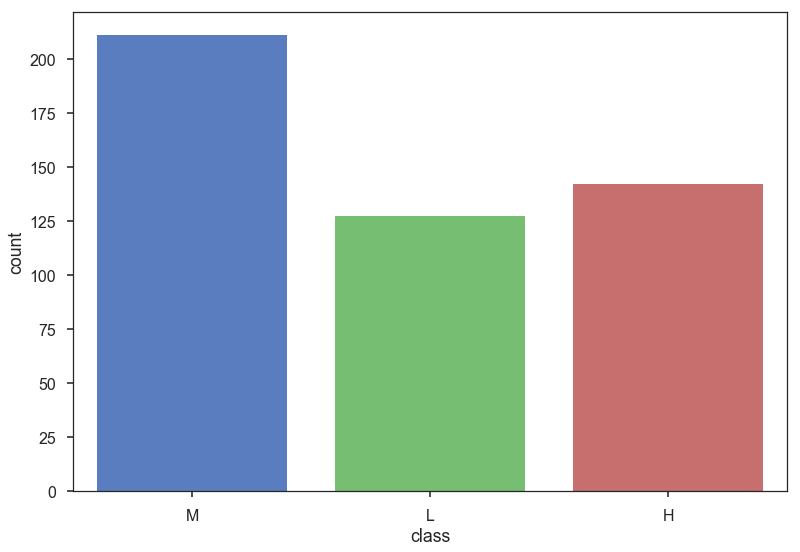

In [18]:
sns.set_palette('muted')
sns.set_style('ticks')

for col in data.columns.values:
    sns.countplot(data=data, x=col)
    sns.plt.show()

## Count plots of multiple variables

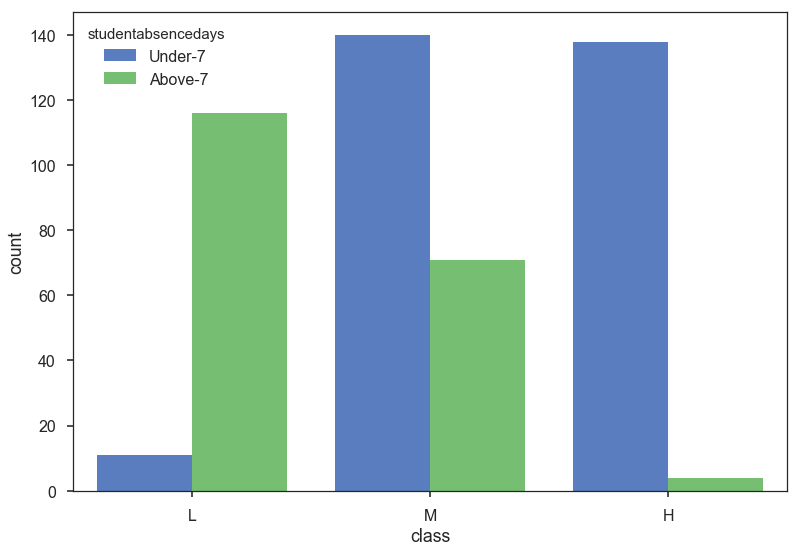

In [19]:
sns.countplot(data=data, x='class', hue='studentabsencedays', order=['L', 'M', 'H'])
sns.plt.show()

## Plot the continuous variables as a distribution

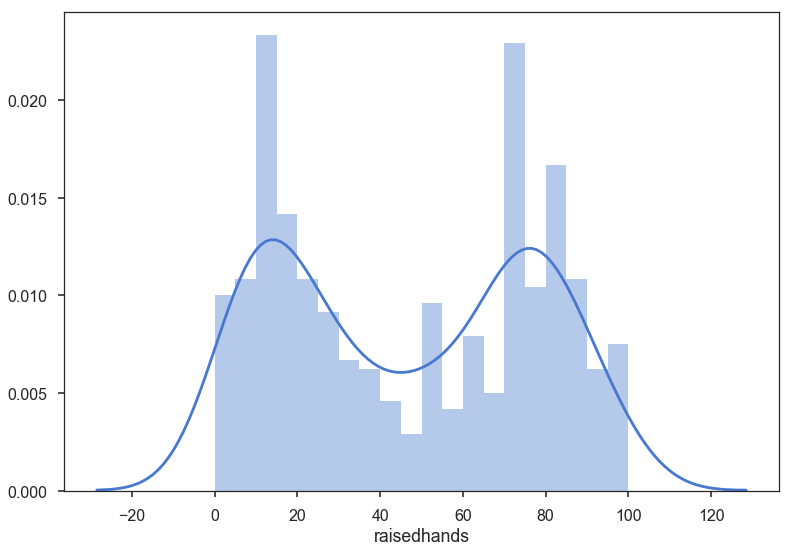

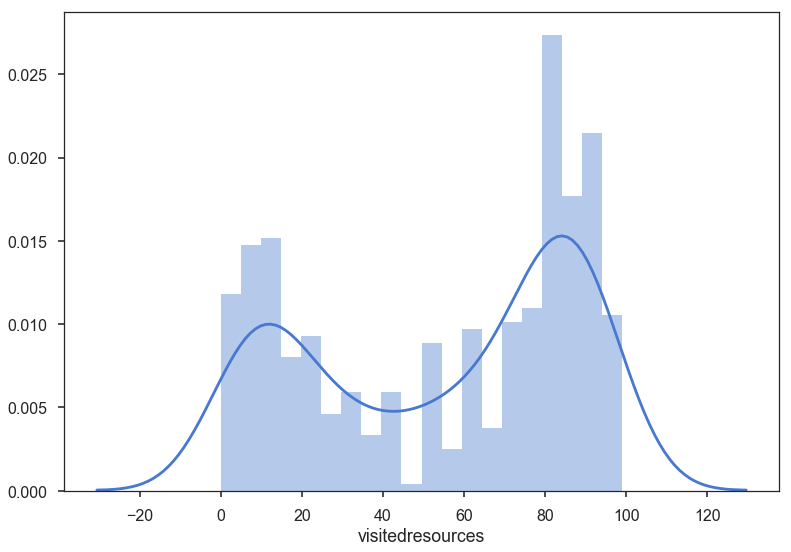

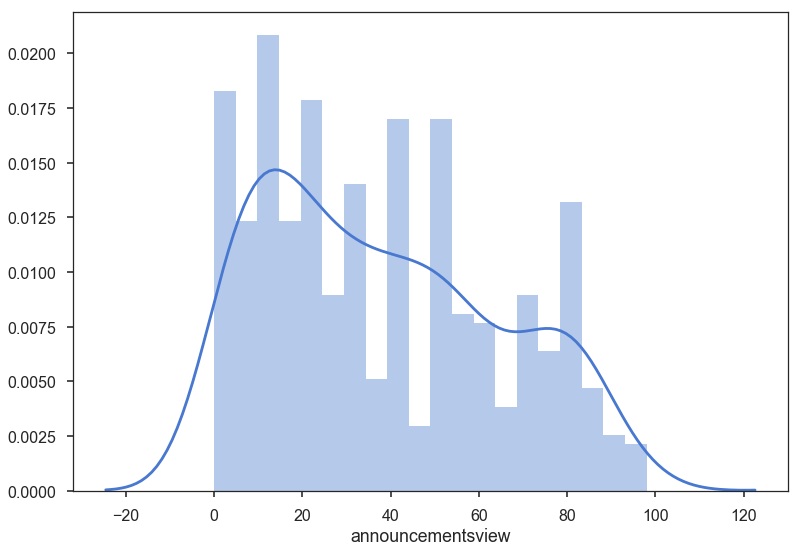

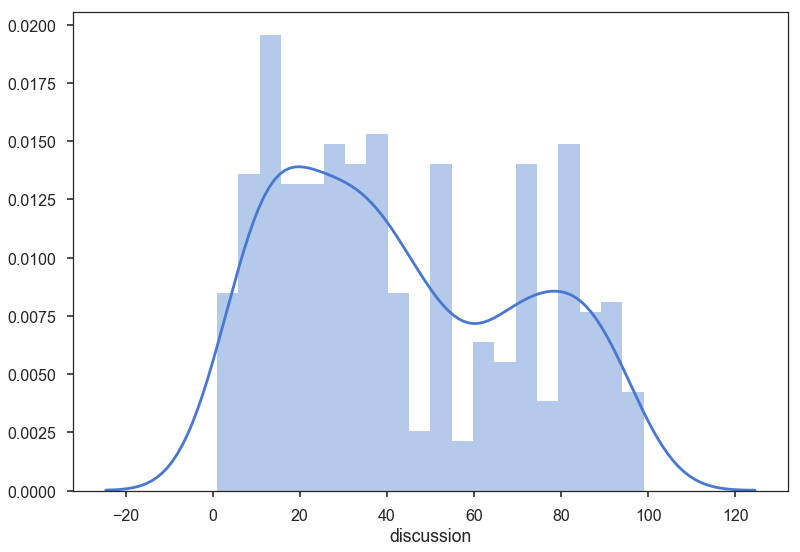

In [20]:
for col in ['raisedhands', 'visitedresources', 'announcementsview',  'discussion']:
    sns.distplot(data[col], bins=20)
    sns.plt.show()

## Distributions for different performance levels

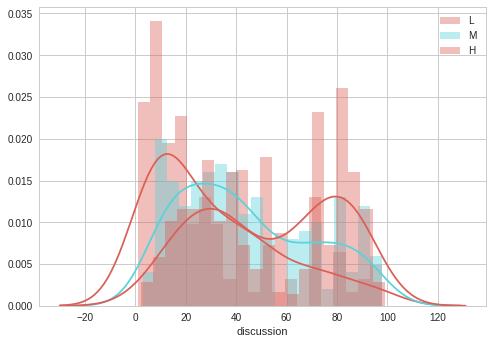

In [7]:
for p in ['L', 'M', 'H']:
    sns.distplot(data[data['class']==p]['discussion'], bins=20, label=p)
sns.plt.legend()
sns.plt.show()

## Recode performance into numbers

In [22]:
data['performance'] = data['class'].replace({'L': 0, 'M': 1, 'H': 2})
data.head()

,gender,nationality,placeofbirth,stageid,gradeid,topic,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class,performance
0,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,1
1,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,1
2,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,0
3,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,0
4,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,1


## What are the features again?

In [23]:
print('The features of this dataset are %s' % data.columns.values)

The features of this dataset are ['gender' 'nationality' 'placeofbirth' 'stageid' 'gradeid' 'topic'
 'semester' 'relation' 'raisedhands' 'visitedresources' 'announcementsview'
 'discussion' 'parentansweringsurvey' 'parentschoolsatisfaction'
 'studentabsencedays' 'class' 'performance']


In [48]:
sns.set_style('ticks')
sns.set_palette('muted')

## To make a bar plot:

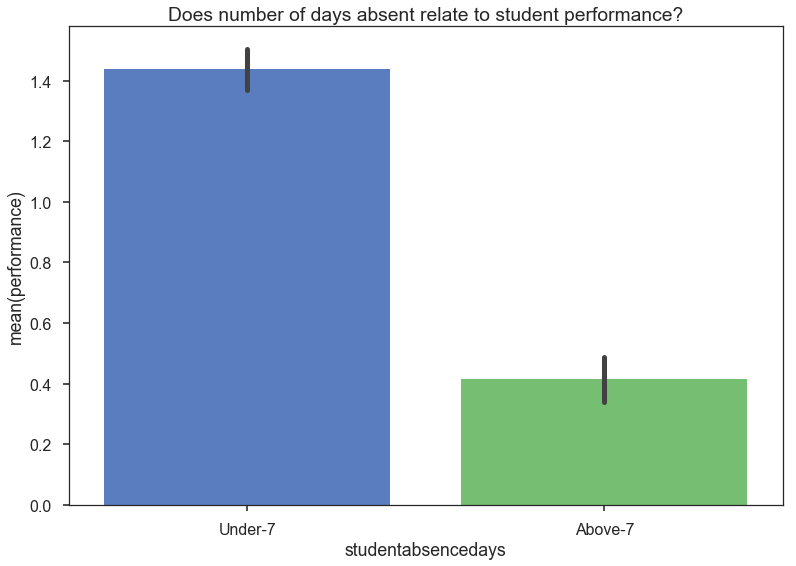

In [25]:
sns.barplot(data=data, x='studentabsencedays', y='performance')
sns.plt.title('Does number of days absent relate to student performance?')
sns.plt.show()

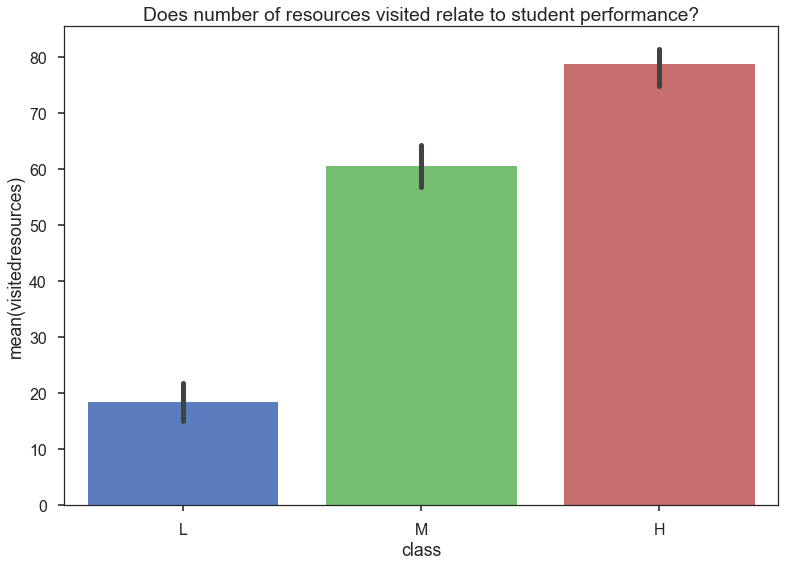

In [26]:
sns.barplot(data=data, x='class', y='visitedresources', order=['L', 'M', 'H'])
sns.plt.title('Does number of resources visited relate to student performance?')
sns.plt.show()

## Run a t-test

In [27]:
from scipy.stats import ttest_ind as ttest

low = data[data['class']=='L']['visitedresources']
high = data[data['class']=='H']['visitedresources']
ttest(low, high)

Ttest_indResult(statistic=-25.665194746420461, pvalue=4.7517211119760376e-74)

## To make a swarm plot

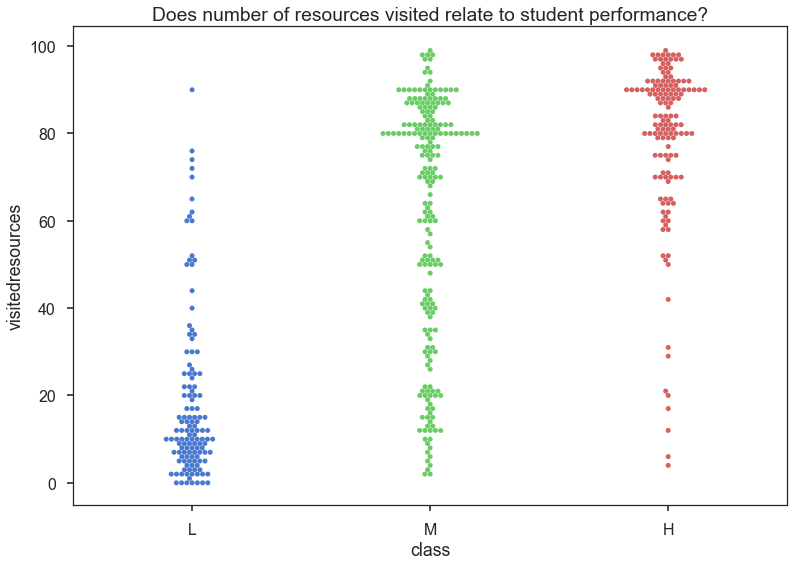

In [28]:
sns.swarmplot(data=data, x='class', y='visitedresources', order=['L', 'M', 'H'])
sns.plt.title('Does number of resources visited relate to student performance?')
sns.plt.show()

## To make a violin plot

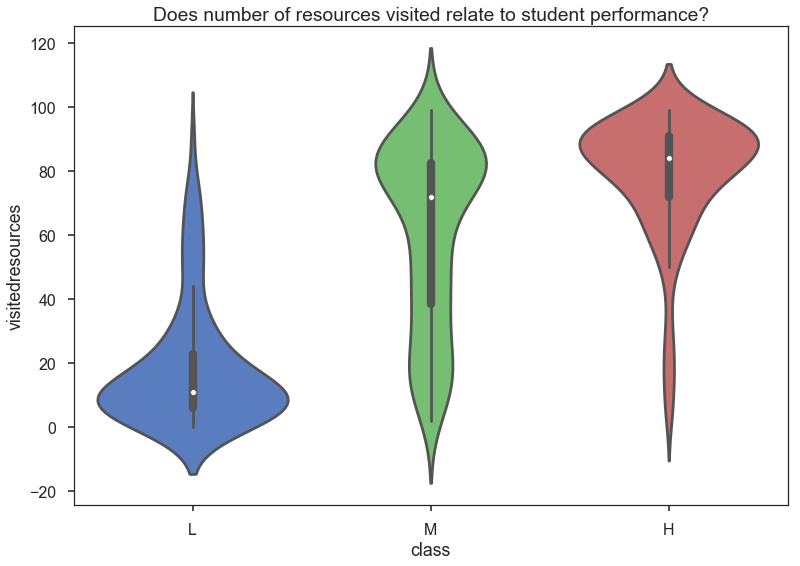

In [29]:
sns.violinplot(data=data, x='class', y='visitedresources', order=['L', 'M', 'H'])
# sns.swarmplot(data=data, x='class', y='visitedresources', order=['L', 'M', 'H'], color='white')
sns.plt.title('Does number of resources visited relate to student performance?')
sns.plt.show()

## To make a correlation plot

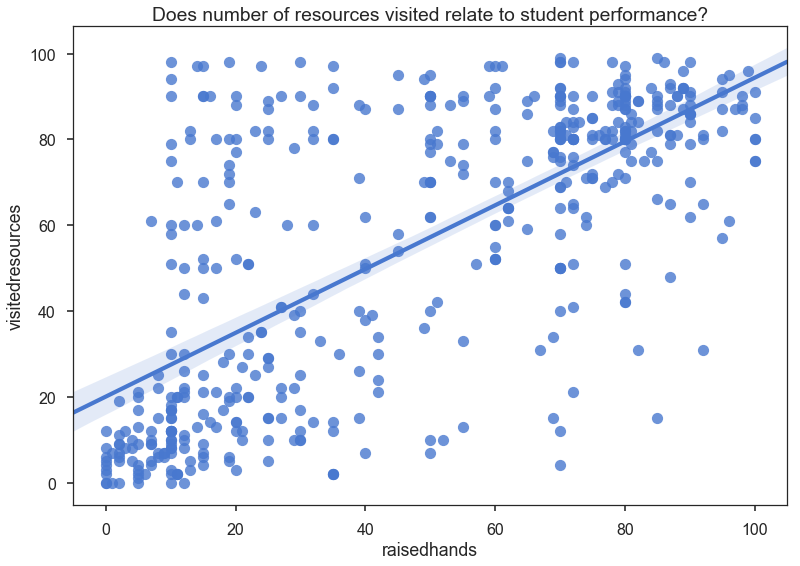

In [30]:
sns.regplot(data=data, x='raisedhands', y='visitedresources')
sns.plt.title('Does number of resources visited relate to student performance?')
sns.plt.show()

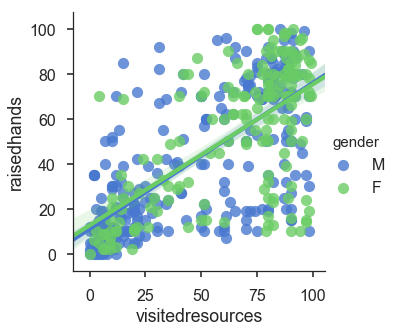

In [51]:
g = sns.lmplot(x="visitedresources", y="raisedhands", hue="gender", data=data)
sns.plt.show()

## Correlation between many variables

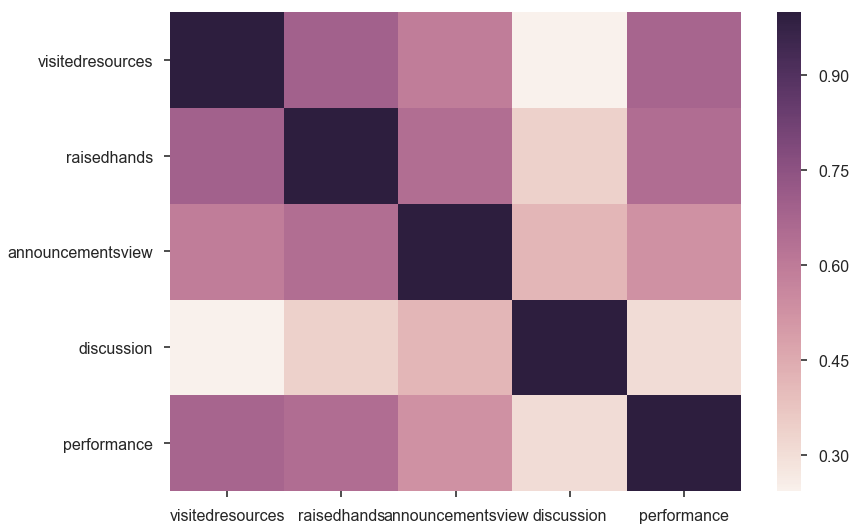

In [31]:
# list the variables you want to correlate
variables_of_interest = ['visitedresources', 'raisedhands', 'announcementsview', 'discussion', 'performance']

# create a correlation matrix
corrmat = data.loc[:,variables_of_interest].corr()

sns.heatmap(corrmat)
sns.plt.show()

In [42]:
features = data.columns.values[:-2]
datamat, labels = hyp.tools.df2mat(data[features], return_labels=True)
datamat = hyp.tools.normalize(datamat)

## Predicting student performance with logistic regression

![logistic_regression](http://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression_files/logistic_regression_schematic.png)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    datamat, data['class'], test_size=0.2, random_state=0)

clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)   
print('Logistic regression classifier accuracy is %f' % clf.score(X_test, y_test))

Logistic regression classifier accuracy is 0.697917


## Predicting student performance with SVM

In [44]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
print('Support vector classifier accuracy is %f' % clf.score(X_test, y_test))

Support vector classifier accuracy is 0.760417


## Predicting student performance with neural networks

In [45]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(
    datamat, data['class'], test_size=0.2, random_state=0)

param_grid = [(a,b,c) for a in range(1, 10) for b in range(1, 10) for c in range(1, 10)]
grid={}

for a, b, c in param_grid:
    clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5,
                        hidden_layer_sizes=(a, b, c), 
                        random_state=1).fit(X_train, y_train)
    grid[(a, b, c)]=clf.score(X_test, y_test)
    
a, b, c = max(grid, key=grid.get)

X_train, X_test, y_train, y_test = train_test_split(
    datamat, data['class'], test_size=0.2, random_state=0)

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(a, b, c), 
                    random_state=1).fit(X_train, y_train)
print('Neural network classifier accuracy is %f' % clf.score(X_test, y_test))

Neural network classifier accuracy is 0.864583


## Predicting student failing with neural networks

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    datamat, data['performance']>0, test_size=0.2, random_state=0)

param_grid = [(a,b,c) for a in range(1, 10) for b in range(1, 10) for c in range(1, 10)]
grid={}

for a, b, c in param_grid:
    clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5,
                        hidden_layer_sizes=(a, b, c), 
                        random_state=1).fit(X_train, y_train)
    grid[(a, b, c)]=clf.score(X_test, y_test)
    
a, b, c = max(grid, key=grid.get)

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(a, b, c), 
                    random_state=1).fit(X_train, y_train)
print('Neural network classifier accuracy is %f' % clf.score(X_test, y_test))

Neural network classifier accuracy is 0.989583
